In [27]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [33]:
batch_size = 512
size_hidden = 20
size = "20,20"
reg_coef = 100
epochs = 4

experiment = f"lr-sweep-{batch_size=}-{size_hidden=}-{epochs=}"

dir_name = f"../outputs/{experiment}/"
lrs = [1 / 10**(i / 2) for i in range(2, 11, 1)]

results = {'bp': {}, 'ewc-reg_coef_ewc=100': {}, 'si-reg_coef_si=3000': {}}

for name in results.keys():
    results[name]['means'] = []
    results[name]['stds'] = []
    results[name]['lrs'] = lrs
    for lr in lrs:
        file_name = dir_name + f"{name}/{lr=}.log"
        with open(file_name) as f:
            f = f.readlines()
        summary = f[-1]
        results[name]['means'].append(float(re.search('mean: (.*) std', summary).group(1)) / 100)
        results[name]['stds'].append(float(re.search('std: (.*)', summary).group(1)) / 100)

In [34]:
results['dfc-sparse-rec'] = {}
results['dfc-sparse-rec']['lrs'] = [1e-05, 3.1622776601683795e-05, 0.0001, 0.0003162277660168, 0.001, 0.0031622776601683, 0.01, 0.0316227766016837, 0.1]
results['dfc-sparse-rec']['means'] = [0.5665199999999999, 0.70238, 0.78666, 0.8097200000000001, 0.78538, 0.7660799999999999, 0.70966, 0.6965600000000001, 0.7021]
results['dfc-sparse-rec']['stds'] = [0.07465860298719768, 0.047048931975125656, 0.031830142946584435, 0.027305896799043234, 0.03800811755401735, 0.022543446941406222, 0.04923832856627048, 0.033212994444945854, 0.05558322588695258]

In [35]:
def get_score_n_best_consecutive(means, window):
    best_score = 0
    for i in range(len(means) - window):
        curr_score = np.mean(means[i:i+window])
        if curr_score > best_score:
            best_score = curr_score

    return best_score

bp 0.66
ewc-reg_coef_ewc=100 0.69
si-reg_coef_si=3000 0.77
dfc-sparse-rec 0.76


Text(0.5, 1.0, 'lr-sweep-batch_size=512-size_hidden=20-epochs=4')

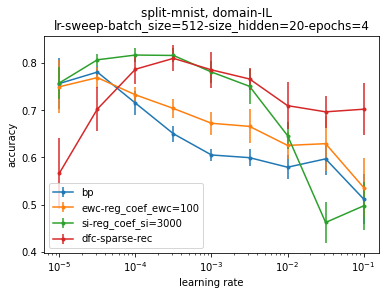

In [37]:
window = 6
for name, val in results.items():
    plt.errorbar(val['lrs'], val['means'], yerr=val['stds'], label=name, fmt=".-")
    np.save(f'{name}-means.npy', val['means'])
    np.save(f'{name}-stds.npy', val['stds'])
    print(name, round(get_score_n_best_consecutive(val['means'], window), 2))
plt.legend()
plt.xscale('log')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.suptitle('split-mnist, domain-IL')
plt.title(experiment)

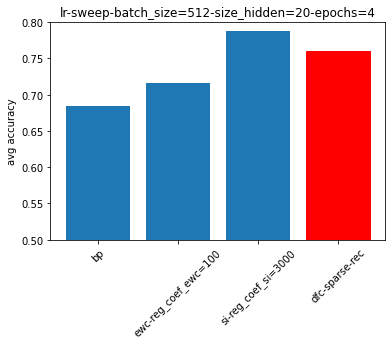

In [32]:
dynamic_eval_range = True
nr_lr_intervals_to_eval = 6  # only used if `dynamic_eval_range == True`
window = 6

means = []
for name, val in results.items():
    
    if dynamic_eval_range:
        score = get_score_n_best_consecutive(val['means'], window)
        means.append(score)
    else:
        raise NotImplementedError()


barlist = plt.bar(results.keys(), means)
plt.xticks(rotation = 45)
plt.ylim(0.5, 0.8)
plt.title(experiment)
plt.ylabel('avg accuracy')
for i in range(1, 2):
    barlist[-i].set_color('r')